In [26]:
from keras.datasets import imdb
from keras import models
from keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
import numpy as np

In [19]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [21]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [22]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] =1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [23]:
model= models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [25]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

C:\Users\ASUS\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [27]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [30]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 71ms/step - loss: 0.5262 - acc: 0.7745 - val_loss: 0.3932 - val_acc: 0.8665
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3077 - acc: 0.9024 - val_loss: 0.3008 - val_acc: 0.8894
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2217 - acc: 0.9266 - val_loss: 0.2766 - val_acc: 0.8933
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1743 - acc: 0.9434 - val_loss: 0.2809 - val_acc: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1445 - acc: 0.9534 - val_loss: 0.2932 - val_acc: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1187 - acc: 0.9626 - val_loss: 0.3407 - val_acc: 0.8697
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0985 - acc: 0.9712 - val_loss: 0.3169 - val_acc: 0.8835
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0810 - a

In [31]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

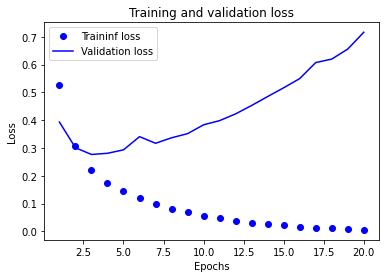

In [33]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Traininf loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

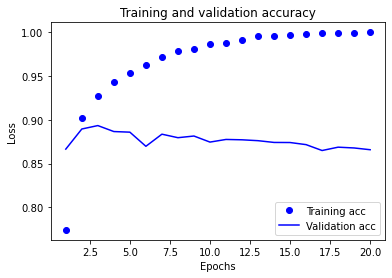

In [36]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train[0:3000], y_train[0:3000], epochs=3, batch_size=128)
results = model.evaluate(x_test, y_test)

Epoch 1/3
24/24 [==============================] - 1s 11ms/step - loss: 0.5729 - accuracy: 0.7340
Epoch 2/3
24/24 [==============================] - 0s 11ms/step - loss: 0.3236 - accuracy: 0.9153
Epoch 3/3
24/24 [==============================] - 0s 11ms/step - loss: 0.1902 - accuracy: 0.9617


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [46]:
model.predict(x_test[0:3000])

array([[0.5013072 ],
       [0.9881115 ],
       [0.79378223],
       ...,
       [0.8846755 ],
       [0.21616334],
       [0.26129162]], dtype=float32)